# Loding image data

In this notebook I will teach myself how to operate on real world image datasets

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

`transform.Compose()` accepts list of transorms and run them in a sequence

In [2]:
# define transform
transform = transforms.Compose([transforms.Resize(255),
                               transforms.CenterCrop(224),
                               transforms.ToTensor()])
# create transformed dataset
dataset = datasets.ImageFolder("Cat_Dog_data/train/", transform=transform)

# create dataloader - returns batches of images with labels (generator)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

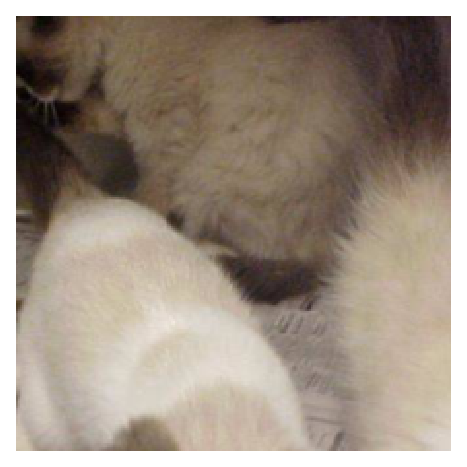

In [3]:
# test data loader
images, labels = next(iter(dataloader))
helper.imshow(images[63], normalize=False)

## Data Augmentation

The goal here is to introduce randomness to the trainging data. Operations like:
    - randomly rotate
    - mirror
    - scale
    - crop
will help network to generalize better

In [8]:
train_transforms = transforms.Compose([transforms.RandomRotation(27),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.Grayscale(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5],[0.5])])

test_transforms = transforms.Compose([
                               transforms.CenterCrop(224),
                               transforms.Grayscale(),
                               transforms.ToTensor(),
                               transforms.Normalize([0.5],[0.5])])

train_data = datasets.ImageFolder("Cat_Dog_data/train/", train_transforms)
test_data = datasets.ImageFolder("Cat_Dog_data/test/", test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

torch.Size([64, 1, 224, 224])

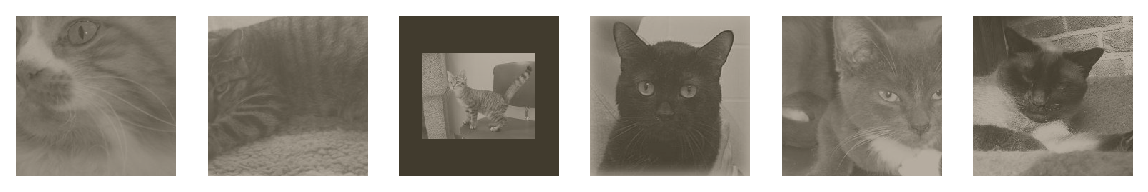

In [9]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=6)
for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax)

images.shape